# Remove images without labels

In [34]:
import os

train_img_path = "Datasets/IMAGES"  
train_label_path = "Datasets/LABELS" 
train_img_dir = os.listdir(train_img_path)
train_label_dir = os.listdir(train_label_path)

In [35]:
train_img_files = [img_path.replace(".jpg",".txt") for img_path in train_img_dir]

train_imgs_to_delete = list(set(train_img_files) ^ set(train_label_dir))
train_imgs_to_delete = [img_path.replace(".txt",".jpg") for img_path in train_imgs_to_delete]

In [36]:
for train_img_to_delete in train_imgs_to_delete:
    path = train_img_path + "/" + train_img_to_delete
    if os.path.exists(path):
        os.remove(path)

# Read Data

In [37]:
import os

dataset_path = "Datasets"

images_path = dataset_path + "/IMAGES"
labels_path = dataset_path + "/LABELS"

images_dir = os.listdir(images_path)
labels_dir = os.listdir(labels_path)

In [ ]:
import numpy as np

images_dir = np.array(images_dir)

precentage_train_data = 95

# Calculate the number of elements for the first array
train_data_len = int(len(images_dir) * (precentage_train_data / 100.0))

# Create an array of indices for the first array
train_indices = np.random.choice(len(images_dir), size=train_data_len, replace=False)

# Create the first array
train_data = images_dir[train_indices]

# Create the second array by excluding the indices used for the first array
test_data = np.delete(images_dir, train_indices)

print("Train data with 97% of data:", train_data, len(train_data))
print("Test data 3% of data:", test_data, len(test_data))

In [39]:
output_file_path = 'Datasets/train.txt'

# Write image IDs to the train.txt file
with open(output_file_path, 'w') as file:
    for image_id in train_data:
        # Split the filename and get the image ID without the extension
        image_id_without_extension = image_id.split('.')[0]

        # Write the image ID to the file
        file.write(image_id_without_extension + '\n')

In [40]:
output_file_path = 'Datasets/test.txt'

# Write image IDs to the train.txt file
with open(output_file_path, 'w') as file:
    for image_id in test_data:
        # Split the filename and get the image ID without the extension
        image_id_without_extension = image_id.split('.')[0]

        # Write the image ID to the file
        file.write(image_id_without_extension + '\n')

In [24]:
def find_empty_txt_files(directory):
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file has a .txt extension
        if filename.endswith(".txt"):
            # Construct the full path to the file
            file_path = os.path.join(directory, filename)

            # Check if the file is empty
            if os.path.getsize(file_path) == 0:
                print(f"Empty file: {filename}")

# Specify the directory path
directory_path = "/home/omar/yolo2voc/Datasets/VOC/Labels"

# Call the function to find and print empty .txt files
find_empty_txt_files(directory_path)


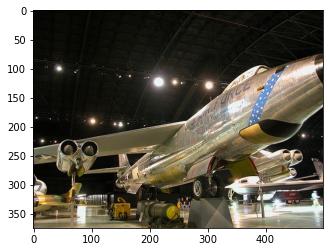

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'your_image_path.jpg' with the actual path to your image file
image_path = 'Datasets/IMAGES/007292.jpg'

# Load the image using matplotlib.image.imread
img = mpimg.imread(image_path)

# Display the image using matplotlib.pyplot.imshow
plt.imshow(img)

# Show the plot
plt.show()

In [4]:
!python eval.py

DATA PREPARING...
DONE.

START TESTING...
Loading YOLO model...
Done loading!
100%|█████████████████████████████████████████| 499/499 [00:17<00:00, 29.15it/s]
Evaluate the detection result...
class aeroplane AP 0.0
mAP 0.0


In [1]:
!python main.py --num_epochs 1 --batch_size 12 --quantize --weight_bit_width 8 --act_bit_width 8 --base_dir Datasets/ --log_dir ./weights

CUDA DEVICE COUNT: 1
Number of training images:  9464


Starting epoch 0 / 1

     epoch      loss       gpu
  0%|                                                   | 0/789 [00:00<?, ?it/s]/home/omar/miniconda3/lib/python3.11/site-packages/torch/nn/modules/activation.py:292: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:368.)
  return torch.sigmoid(input)
/home/omar/yolov1_pytorch/utils/loss.py:50: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:83.)
  noobj_conf_mask = torch.cuda.BoolTensor(noobj_pred.size()).fill_(0)
100%|███████████████████████████████████████████| 84/84 [00:06<00:00, 12.24it/s]
Traceback (most recent call last):

In [5]:
from brevitas.export import export_finn_onnx
import torch
from nets.nn import *


IN_CH = 448
OUT_CH = 448
BATCH_SIZE = 1

yolo = YOLOv1() 
yolo = torch.nn.DataParallel(yolo)
yolo.load_state_dict(torch.load("weights/best.pth")['state_dict'])

path = 'onnx_models/yolov1_quant.onnx'
inp = torch.randn(BATCH_SIZE,3, IN_CH, OUT_CH).cuda()

detection_model = yolo.module
detection_model.cuda()
detection_model.eval()

exported_model = export_finn_onnx(detection_model, inp, path, opset_version=12)